In [2]:
import pandas as pd

In [3]:
pima = pd.read_csv("pima_indians_diabetes_all.csv")

In [4]:
pima

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
pima.columns

Index(['preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age', 'diabetes_class'],
      dtype='object')

In [6]:
X = pima[['preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age']]
Y =pima[['diabetes_class']]  

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size = 0.8,random_state = 1)

In [9]:
x_train

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt =  DecisionTreeClassifier()

In [12]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
y_pred = pd.Series(dt.predict(x_test))

In [15]:
y_pred

0      0
1      0
2      0
3      1
4      0
      ..
149    0
150    0
151    1
152    0
153    0
Length: 154, dtype: int64

In [16]:
y_test.reset_index(drop=True,inplace=True)

In [17]:
y_test

,diabetes_class
0,0
1,0
2,0
3,0
4,0
...,...
149,0
150,0
151,1
152,0


In [18]:
y_both = pd.concat([y_test,y_pred],axis=1)
y_both.columns = ["Actual","Predicted"]
y_both

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
149,0,0
150,0,0
151,1,1
152,0,0


In [19]:
from sklearn import metrics

In [20]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77        99
           1       0.59      0.60      0.59        55

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



In [58]:
dt1 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [59]:
dt1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [60]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [61]:
y_pred1 = dt1.predict(x_test)

In [62]:
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        99
           1       0.66      0.49      0.56        55

    accuracy                           0.73       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.72      0.73      0.72       154



In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

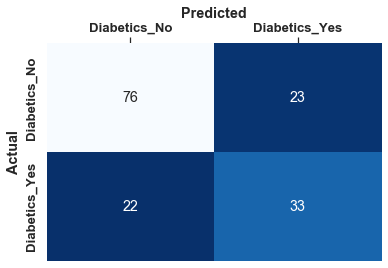

In [64]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),cmap="Blues_r",annot=True,cbar=False)
ax.set_xlabel("Predicted",weight = "bold");ax.set_ylabel("Actual",weight = "bold")
ax.xaxis.set_ticklabels(["Diabetics_No","Diabetics_Yes"],weight = "bold");ax.yaxis.set_ticklabels(["Diabetics_No","Diabetics_Yes"],weight = "bold",va = "center")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
sns.set(font_scale=1.2)


In [69]:
# # Create DOT data
# from sklearn import tree
# import pydotplus
# from PIL import Image
# dot_data = tree.export_graphviz(dt,filled=True,rounded=True)
# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)
# # graph.write_png('tre.png')
# # plt.imshow(plt.imread('tre.png'))
# Image.open('tre.png')


In [70]:
# from sklearn import tree
# import pydotplus

# dot_data=tree.export_graphviz(dt,filled=True,rounded=True)
# graph=pydotplus.graph_from_dot_data(dot_data)
# graph.write_png('tree.png')    
# plt.imshow(plt.imread('tree.png'))